In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

Cranial = pd.read_csv('Data/Felidae Cranial Data.csv',delimiter=',')
Forelimb= pd.read_csv('Data/Felidae and Canidae postcranial database.csv',delimiter=',')

print("Cranial:", Cranial.shape,", Forelimb:", Forelimb.shape)

Forelimb_Data=Forelimb.values[:261,:] #cut out dogs

Forelimb_genusID=Forelimb_Data[:,2]
Forelimb_speciesID=Forelimb_Data[:,3]
Forelimb_sexID=Forelimb_Data[:,4]

Cranial_Data=Cranial.values

Cranial_genusID=Cranial_Data[:,2]
Cranial_speciesID=Cranial_Data[:,3]
Cranial_sexID=Cranial_Data[:,4]

ComboData_All=Cranial.merge(Forelimb,how='outer', on=None, left_on='Catalog no.', right_on='Catalog no.')
ComboData_Shared=Cranial.merge(Forelimb,how='inner', on=None, left_on='Catalog no.', right_on='Catalog no.')

ComboShared_Data=ComboData_Shared.values
ComboAll_Data=ComboData_All.values

ComboShared_NumData=np.delete(ComboShared_Data,np.arange(52,58),axis=1)#52-57 unnecessary repeats

imp=Imputer(missing_values='NaN', strategy='mean', axis=0, copy=True)
Cranial_filled_data=imp.fit_transform(Cranial_Data[:,7:])
Forelimb_filled_data=imp.fit_transform(Forelimb_Data[:,7:])
ComboShared_filled_data=imp.fit_transform(ComboShared_NumData[:,7:])

ComboShared_speciesID=ComboShared_NumData[:,3]
ComboShared_genusID=ComboShared_NumData[:,2]
ComboShared_sexID=ComboShared_NumData[:,4]

Cranial: (338, 52) , Forelimb: (323, 61)


In [2]:
def NullsInFrame(df):
    if df.isnull().values.any() == True:
        df_a = df.isnull().sum().sum()
        df_b = df.shape[0]*df.shape[1]
        print("There are", df_a, "NaN(s) out of,", df_b ,"total cells, which is", 100*df_a/df_b,"% of the data."  )
    else:
        print("No NaN")

In [3]:
NullsInFrame(Cranial)

There are 439 NaN(s) out of, 17576 total cells, which is 2.4977241693218026 % of the data.


In [4]:
NullsInFrame(Forelimb)

There are 2694 NaN(s) out of, 19703 total cells, which is 13.673044714002943 % of the data.


In [5]:
NaNpercentages = np.array([0.024977, 0.136730, 0.075810, 0.450602])
dfNames = np.array([["Cranial Data", "Forelimb Data", "Combined Overlap Data", "Combined Data"]])

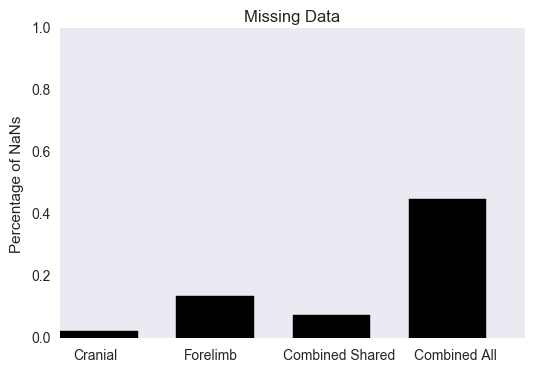

In [6]:
y = NaNpercentages
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="black")
plt.title('Missing Data')
plt.ylabel('Percentage of NaNs')
plt.xlabel('')
plt.grid(b=0)
plt.xticks([0.3, 1.3, 2.4, 3.4], ["Cranial", "Forelimb", "Combined Shared", "Combined All"])
plt.ylim(0, 1)
plt.savefig('NaNGraph.jpg')

In [7]:
from sklearn.preprocessing import Imputer
print(ComboShared_Data[-1,:])  #52-57 unnecessary

ComboShared_NumData=np.delete(ComboShared_Data,np.arange(52,58),axis=1)
print(ComboShared_NumData[-1,:])

imp=Imputer(missing_values='NaN', strategy='mean', axis=0, copy=True)
Cranial_filled_data=imp.fit_transform(Cranial_Data[:,7:])
Forelimb_filled_data=imp.fit_transform(Forelimb_Data[:,7:])
ComboShared_filled_data=imp.fit_transform(ComboShared_NumData[:,7:])

['MVZ' '81547' 'Puma' 'concolor' 'unknown' 'U.S.'
 'Montana; Bitterroot river' 224.7 68.0 90.0 67.4 85.7 64.9 155.3 83.8 46.7
 79.1 24.2 59.0 74.6 42.3 93.8 6.5 5.2 14.8 12.3 10.0 15.4 12.3 22.9 64.7
 24.8 14.1 10.6 9.1 13.2 6.8 11.1 15.2 8.5 17.7 8.8 45.7 27.3 73.5 79.0
 144.9 27.6 15.0 25.4 14.6 42.3 'MVZ' 'Puma' 'concolor' 'unknown' 'U.S.'
 'Montana; Bitterroot river' 258.4 45.5 208.2 24.3 26.6 19.1 40.8 26.6 29.3
 18.4 248.7 62.8 23.0 63.1 39.0 42.3 83.4 14.3 18.5 16.8 15.2 10.6 90.9
 17.6 15.5 17.0 15.7 10.5 86.4 13.1 15.1 15.4 15.0 8.9 71.3 15.6 12.9 15.8
 14.8 9.1 35.2 15.0 12.4 10.8 9.0 9.2 28.0 13.0 11.4 11.7 8.6 8.8 25.7 19.4]
['MVZ' '81547' 'Puma' 'concolor' 'unknown' 'U.S.'
 'Montana; Bitterroot river' 224.7 68.0 90.0 67.4 85.7 64.9 155.3 83.8 46.7
 79.1 24.2 59.0 74.6 42.3 93.8 6.5 5.2 14.8 12.3 10.0 15.4 12.3 22.9 64.7
 24.8 14.1 10.6 9.1 13.2 6.8 11.1 15.2 8.5 17.7 8.8 45.7 27.3 73.5 79.0
 144.9 27.6 15.0 25.4 14.6 42.3 258.4 45.5 208.2 24.3 26.6 19.1 40.8 26.6
 29.3 18.

In [8]:
def train_test(df_ind, percent):
    train_ind = np.random.choice(np.arange(0,len(df_ind)), size=(len(df_ind)*percent), replace=False, p=None)
    test_ind = np.setdiff1d(np.arange(0,1000), train_ind)

In [9]:
from sklearn.decomposition import PCA
def test_train_pca(original_pf, df_value, df_ind, test_percent):
    #create test and train indices
    L = len(df_value)
    train_ind = np.random.choice(np.arange(0,len(df_ind)), size=(len(df_ind)*test_percent), replace=False, p=None)
    test_ind = np.setdiff1d(np.arange(0,L), train_ind)
    
    #run pca on test data
    test_pca = PCA()
    test_pca.fit(df_value[train_ind,:], df_ind[train_ind])
    explained_variance = test_pca.explained_variance_ratio_
    
    #first and second component graph
    value_pca = test_pca.transform(df_value)
    fig = plt.figure()
    ax = plt.subplot(111)
    
    for sp in set(df_ind):
        myspecies = original_pf.str.contains(sp)
        p = plt.plot(value_pca[np.ix_(myspecies), 0].flatten(),
            value_pca[np.ix_(myspecies), 1].flatten(),
            '.', label = sp)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        box = ax.get_position()
        #ax.set_position([box.x0, box.y0 + box.height*0.1, box.width, box.height*0.9])
        #plt.legend(loc = 'upper center',bbox_to_anchor=(0.5, -0.5), ncol=5)
        plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    return(p)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


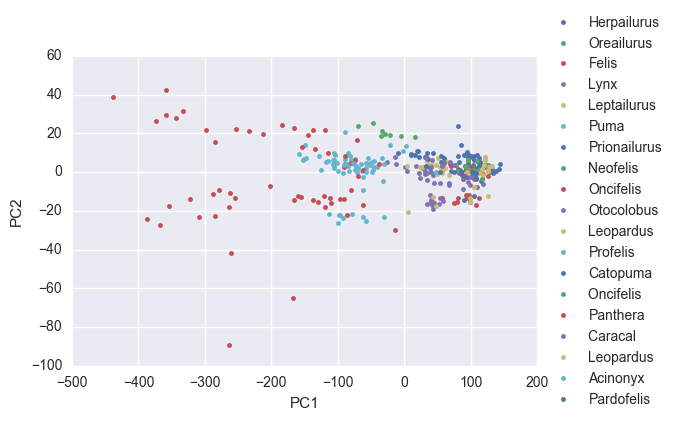

In [10]:
test_train_pca(Cranial.Genus, Cranial_filled_data, Cranial_genusID, 0.8)
plt.savefig('Cranialgenus_pca.jpg')

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


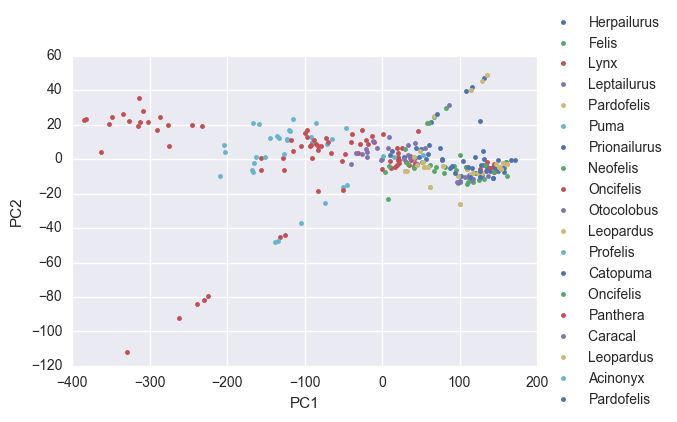

In [11]:
test_train_pca(Forelimb.Genus, Forelimb_filled_data, Forelimb_genusID, 0.8)
plt.savefig('Forelimbgenus_pca.jpg')

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


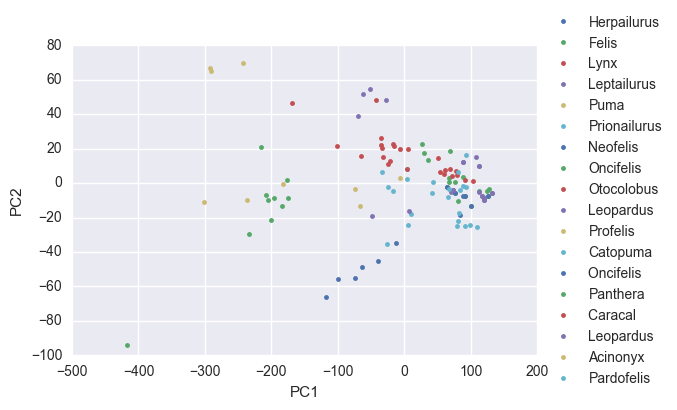

In [12]:
test_train_pca(ComboData_Shared.Genus_x, ComboShared_filled_data, ComboShared_genusID, 0.8)
plt.savefig('ComboSharedgenus_pca.jpg')

In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()
svc_model = SVC()

def cross_val_class_accuracy(model, df_value, df_id, r, train_percent, reps):
    score = np.array([])
    test_pca = PCA()
    
    for i in range(reps):

        L = len(df_value)
        train_ind = np.random.choice(np.arange(0,len(df_id)), size=(len(df_id)*train_percent), replace=False, p=None)
        test_ind = np.setdiff1d(np.arange(0,L), train_ind)

        train = df_value[train_ind,:]
        test = df_value[test_ind,:]

        test_pca.fit(train)
        
              
        transformed_train = test_pca.transform(train)[:, :r]
        transformed_test = test_pca.transform(test)[:, :r]

        model.fit(transformed_train, df_id[train_ind])
        predicted = model.predict(transformed_test)

        this_score = np.mean(predicted == df_id[test_ind])
        score = np.append(score, this_score)
        ave = sum(score)/len(score)
    return(score)
    

In [14]:
cross_val_class_accuracy(svc_model, Forelimb_filled_data, Forelimb_speciesID, 5, 0.9, 50)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 0.07407407,  0.07407407,  0.07407407,  0.        ,  0.07407407,
        0.        ,  0.03703704,  0.07407407,  0.        ,  0.        ,
        0.03703704,  0.07407407,  0.        ,  0.03703704,  0.11111111,
        0.03703704,  0.        ,  0.03703704,  0.07407407,  0.14814815,
        0.07407407,  0.        ,  0.03703704,  0.        ,  0.        ,
        0.03703704,  0.07407407,  0.        ,  0.07407407,  0.        ,
        0.03703704,  0.        ,  0.11111111,  0.        ,  0.03703704,
        0.07407407,  0.        ,  0.07407407,  0.        ,  0.03703704,
        0.03703704,  0.07407407,  0.03703704,  0.07407407,  0.07407407,
        0.        ,  0.07407407,  0.03703704,  0.        ,  0.03703704])

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

lda = LinearDiscriminantAnalysis()
DTC = DecisionTreeClassifier(max_depth = 10)
kn2_model = KNeighborsClassifier(n_neighbors = 2)
kn10_model = KNeighborsClassifier(n_neighbors = 10)
svc_model = SVC(kernel='linear')

trainfrac = 0.8
reps = 100

cg_lda_r2_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_lda_r5_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)

cg_knn2_r2_scores = cross_val_class_accuracy(kn2_model, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_knn2_r5_scores = cross_val_class_accuracy(kn2_model, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)

cg_knn10_r2_scores = cross_val_class_accuracy(kn10_model, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_knn10_r5_scores = cross_val_class_accuracy(kn10_model, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)

cg_svm_r2_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_svm_r5_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)

cg_tree_r2_scores = cross_val_class_accuracy(DTC, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_tree_r5_scores = cross_val_class_accuracy(DTC, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)


C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


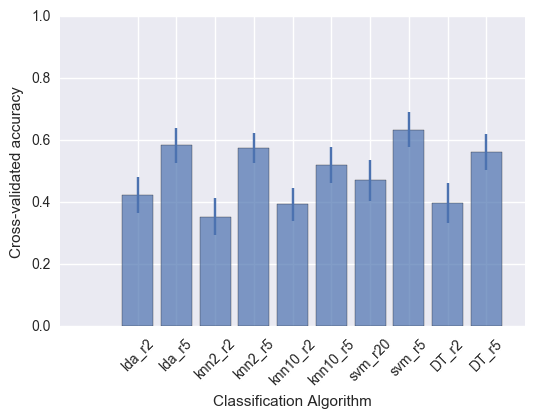

In [16]:
classifiers = ('lda_r2', 'lda_r5', 'knn2_r2', 'knn2_r5', 'knn10_r2', 'knn10_r5', 'svm_r20', 'svm_r5', 'DT_r2', 'DT_r5')
scores = [cg_lda_r2_scores.mean(), cg_lda_r5_scores.mean(), cg_knn2_r2_scores.mean(), cg_knn2_r5_scores.mean(), cg_knn10_r2_scores.mean(), cg_knn10_r5_scores.mean(), cg_svm_r2_scores.mean(), cg_svm_r5_scores.mean(), cg_tree_r2_scores.mean(), cg_tree_r5_scores.mean()]
scores_err = [cg_lda_r2_scores.std(), cg_lda_r5_scores.std(), cg_knn2_r2_scores.std(), cg_knn2_r5_scores.std(), cg_knn10_r2_scores.std(), cg_knn10_r5_scores.std(), cg_svm_r2_scores.std(), cg_svm_r5_scores.std(), cg_tree_r2_scores.std(), cg_tree_r5_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('CG_all.jpg')

In [17]:
cg_lda_r2_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_lda_r5_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)

cg_lda_r20_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_genusID, 20, trainfrac, reps)

cg_lda_r45_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_genusID, 45, trainfrac, reps)

cg_svm_r2_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

cg_svm_r5_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_genusID, 5, trainfrac, reps)

cg_svm_r20_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_genusID, 20, trainfrac, reps)

cg_svm_r45_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_genusID, 45, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


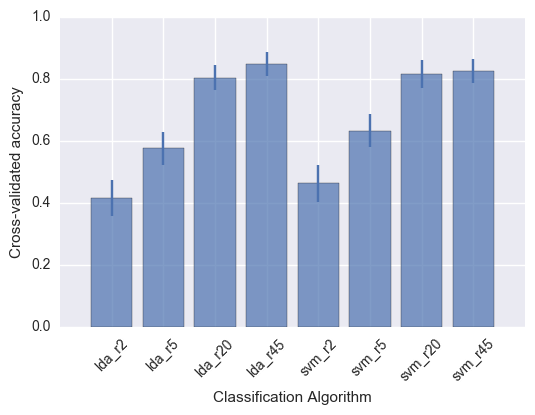

In [18]:
classifiers = ('lda_r2', 'lda_r5', 'lda_r20', 'lda_r45', 'svm_r2', 'svm_r5', 'svm_r20', 'svm_r45')
scores = [cg_lda_r2_scores.mean(), cg_lda_r5_scores.mean(), cg_lda_r20_scores.mean(), cg_lda_r45_scores.mean(), cg_svm_r2_scores.mean(), cg_svm_r5_scores.mean(), cg_svm_r20_scores.mean(), cg_svm_r45_scores.mean()]
scores_err = [cg_lda_r2_scores.std(), cg_lda_r5_scores.std(), cg_lda_r20_scores.std(), cg_lda_r45_scores.std(), cg_svm_r2_scores.std(), cg_svm_r5_scores.std(), cg_svm_r20_scores.std(), cg_svm_r45_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('CG_SVMLDA.jpg')

In [19]:
lda = LinearDiscriminantAnalysis()
DTC = DecisionTreeClassifier(max_depth = 10)
kn2_model = KNeighborsClassifier(n_neighbors = 2)
kn10_model = KNeighborsClassifier(n_neighbors = 10)
svc_model = SVC(kernel='linear')

trainfrac = 0.8
reps = 100

csg_lda_r2_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_genusID, 2, trainfrac, reps)

csg_lda_r5_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_genusID, 5, trainfrac, reps)

csg_knn2_r2_scores = cross_val_class_accuracy(kn2_model, ComboShared_filled_data, ComboShared_genusID, 2, trainfrac, reps)

csg_knn2_r5_scores = cross_val_class_accuracy(kn2_model, ComboShared_filled_data, ComboShared_genusID, 5, trainfrac, reps)

csg_knn10_r2_scores = cross_val_class_accuracy(kn10_model, Cranial_filled_data, Cranial_genusID, 2, trainfrac, reps)

csg_knn10_r5_scores = cross_val_class_accuracy(kn10_model, ComboShared_filled_data, ComboShared_genusID, 5, trainfrac, reps)

csg_svm_r2_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_genusID, 2, trainfrac, reps)

csg_svm_r5_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_genusID, 5, trainfrac, reps)

csg_tree_r2_scores = cross_val_class_accuracy(DTC, ComboShared_filled_data, ComboShared_genusID, 2, trainfrac, reps)

csg_tree_r5_scores = cross_val_class_accuracy(DTC, ComboShared_filled_data, ComboShared_genusID, 5, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


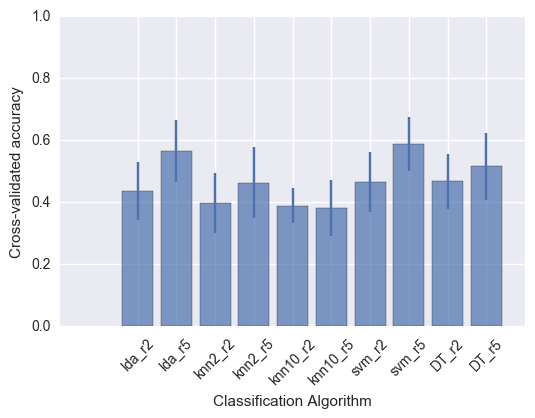

In [20]:
classifiers = ('lda_r2', 'lda_r5', 'knn2_r2', 'knn2_r5', 'knn10_r2', 'knn10_r5', 'svm_r2', 'svm_r5', 'DT_r2', 'DT_r5')
scores = [csg_lda_r2_scores.mean(), csg_lda_r5_scores.mean(), csg_knn2_r2_scores.mean(), csg_knn2_r5_scores.mean(), csg_knn10_r2_scores.mean(), csg_knn10_r5_scores.mean(), csg_svm_r2_scores.mean(), csg_svm_r5_scores.mean(), csg_tree_r2_scores.mean(), csg_tree_r5_scores.mean()]
scores_err = [csg_lda_r2_scores.std(), csg_lda_r5_scores.std(), csg_knn2_r2_scores.std(), csg_knn2_r5_scores.std(), csg_knn10_r2_scores.std(), csg_knn10_r5_scores.std(), csg_svm_r2_scores.std(), csg_svm_r5_scores.std(), csg_tree_r2_scores.std(), csg_tree_r5_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('CSG_all.jpg')

In [21]:
trainfrac = 0.8
reps = 100

fg_lda_r2_scores = cross_val_class_accuracy(lda, Forelimb_filled_data, Forelimb_genusID, 2, trainfrac, reps)

fg_lda_r5_scores = cross_val_class_accuracy(lda, Forelimb_filled_data, Forelimb_genusID, 5, trainfrac, reps)

fg_knn2_r2_scores = cross_val_class_accuracy(kn2_model, Forelimb_filled_data, Forelimb_genusID, 2, trainfrac, reps)

fg_knn2_r5_scores = cross_val_class_accuracy(kn2_model, Forelimb_filled_data, Forelimb_genusID, 5, trainfrac, reps)

fg_knn10_r2_scores = cross_val_class_accuracy(kn10_model, Forelimb_filled_data, Forelimb_genusID, 2, trainfrac, reps)

fg_knn10_r5_scores = cross_val_class_accuracy(kn10_model, Forelimb_filled_data, Forelimb_genusID, 5, trainfrac, reps)

fg_svm_r2_scores = cross_val_class_accuracy(svc_model, Forelimb_filled_data, Forelimb_genusID, 2, trainfrac, reps)

fg_svm_r5_scores = cross_val_class_accuracy(svc_model, Forelimb_filled_data, Forelimb_genusID, 5, trainfrac, reps)

fg_tree_r2_scores = cross_val_class_accuracy(DTC, Forelimb_filled_data, Forelimb_genusID, 2, trainfrac, reps)

fg_tree_r5_scores = cross_val_class_accuracy(DTC, Forelimb_filled_data, Forelimb_genusID, 5, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


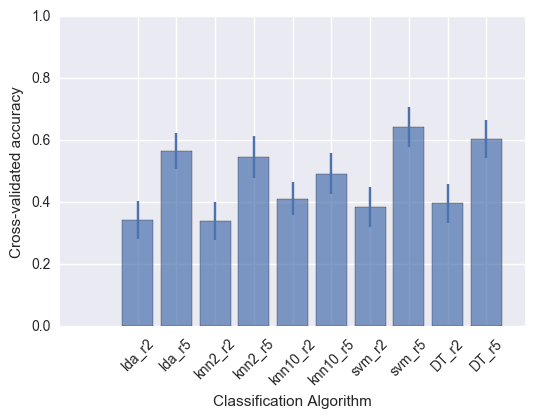

In [22]:
classifiers = ('lda_r2', 'lda_r5', 'knn2_r2', 'knn2_r5', 'knn10_r2', 'knn10_r5', 'svm_r2', 'svm_r5', 'DT_r2', 'DT_r5')
scores = [fg_lda_r2_scores.mean(), fg_lda_r5_scores.mean(), fg_knn2_r2_scores.mean(), fg_knn2_r5_scores.mean(), fg_knn10_r2_scores.mean(), fg_knn10_r5_scores.mean(), fg_svm_r2_scores.mean(), fg_svm_r5_scores.mean(), fg_tree_r2_scores.mean(), fg_tree_r5_scores.mean()]
scores_err = [fg_lda_r2_scores.std(), fg_lda_r5_scores.std(), fg_knn2_r2_scores.std(), fg_knn2_r5_scores.std(), fg_knn10_r2_scores.std(), fg_knn10_r5_scores.std(), fg_svm_r2_scores.std(), fg_svm_r5_scores.std(), fg_tree_r2_scores.std(), fg_tree_r5_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('FG_all.jpg')

In [23]:
cs_lda_r2_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_speciesID, 2, trainfrac, reps)

cs_lda_r5_scores = cross_val_class_accuracy(lda, Cranial_filled_data, Cranial_speciesID, 5, trainfrac, reps)

cs_knn2_r2_scores = cross_val_class_accuracy(kn2_model, Cranial_filled_data, Cranial_speciesID, 2, trainfrac, reps)

cs_knn2_r5_scores = cross_val_class_accuracy(kn2_model, Cranial_filled_data, Cranial_speciesID, 5, trainfrac, reps)

cs_knn10_r2_scores = cross_val_class_accuracy(kn10_model, Cranial_filled_data, Cranial_speciesID, 2, trainfrac, reps)

cs_knn10_r5_scores = cross_val_class_accuracy(kn10_model, Cranial_filled_data, Cranial_speciesID, 5, trainfrac, reps)

cs_svm_r2_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_speciesID, 2, trainfrac, reps)

cs_svm_r5_scores = cross_val_class_accuracy(svc_model, Cranial_filled_data, Cranial_speciesID, 5, trainfrac, reps)

cs_tree_r2_scores = cross_val_class_accuracy(DTC, Cranial_filled_data, Cranial_speciesID, 2, trainfrac, reps)

cs_tree_r5_scores = cross_val_class_accuracy(DTC, Cranial_filled_data, Cranial_speciesID, 5, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


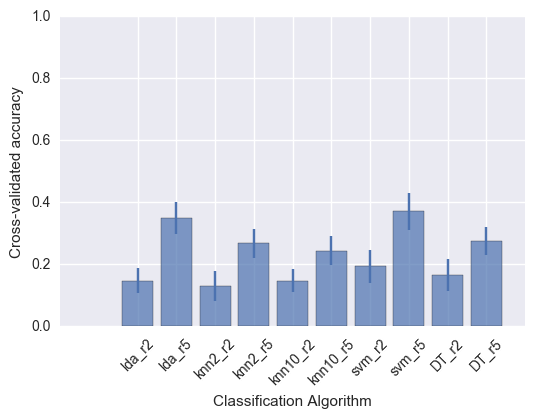

In [24]:
classifiers = ('lda_r2', 'lda_r5', 'knn2_r2', 'knn2_r5', 'knn10_r2', 'knn10_r5', 'svm_r2', 'svm_r5', 'DT_r2', 'DT_r5')
scores = [cs_lda_r2_scores.mean(), cs_lda_r5_scores.mean(), cs_knn2_r2_scores.mean(), cs_knn2_r5_scores.mean(), cs_knn10_r2_scores.mean(), cs_knn10_r5_scores.mean(), cs_svm_r2_scores.mean(), cs_svm_r5_scores.mean(), cs_tree_r2_scores.mean(), cs_tree_r5_scores.mean()]
scores_err = [cs_lda_r2_scores.std(), cs_lda_r5_scores.std(), cs_knn2_r2_scores.std(), cs_knn2_r5_scores.std(), cs_knn10_r2_scores.std(), cs_knn10_r5_scores.std(), cs_svm_r2_scores.std(), cs_svm_r5_scores.std(), cs_tree_r2_scores.std(), cs_tree_r5_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('CS_all.jpg')

In [25]:
css_lda_r2_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 2, trainfrac, reps)

css_lda_r5_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

css_knn2_r2_scores = cross_val_class_accuracy(kn2_model, ComboShared_filled_data, ComboShared_speciesID, 2, trainfrac, reps)

css_knn2_r5_scores = cross_val_class_accuracy(kn2_model, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

css_knn10_r2_scores = cross_val_class_accuracy(kn10_model, Cranial_filled_data, Cranial_speciesID, 2, trainfrac, reps)

css_knn10_r5_scores = cross_val_class_accuracy(kn10_model, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

css_svm_r2_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_speciesID, 2, trainfrac, reps)

css_svm_r5_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

css_tree_r2_scores = cross_val_class_accuracy(DTC, ComboShared_filled_data, ComboShared_speciesID, 2, trainfrac, reps)

css_tree_r5_scores = cross_val_class_accuracy(DTC, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


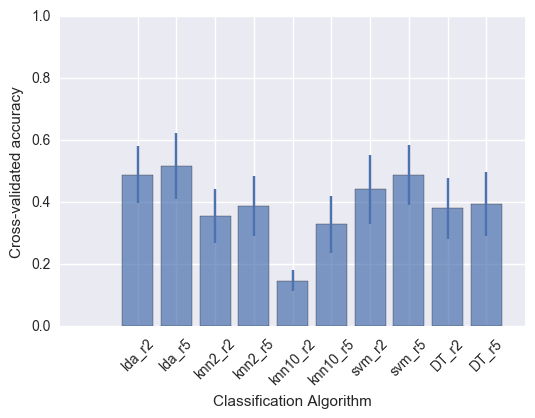

In [26]:
classifiers = ('lda_r2', 'lda_r5', 'knn2_r2', 'knn2_r5', 'knn10_r2', 'knn10_r5', 'svm_r2', 'svm_r5', 'DT_r2', 'DT_r5')
scores = [css_lda_r2_scores.mean(), css_lda_r5_scores.mean(), css_knn2_r2_scores.mean(), css_knn2_r5_scores.mean(), css_knn10_r2_scores.mean(), css_knn10_r5_scores.mean(), css_svm_r2_scores.mean(), css_svm_r5_scores.mean(), css_tree_r2_scores.mean(), css_tree_r5_scores.mean()]
scores_err = [css_lda_r2_scores.std(), css_lda_r5_scores.std(), css_knn2_r2_scores.std(), css_knn2_r5_scores.std(), css_knn10_r2_scores.std(), css_knn10_r5_scores.std(), css_svm_r2_scores.std(), css_svm_r5_scores.std(), css_tree_r2_scores.std(), css_tree_r5_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('CSS_all.jpg')

In [41]:
css_lda_r2_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 2, trainfrac, reps)

css_lda_r5_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

css_lda_r20_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 20, trainfrac, reps)

css_lda_r30_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 30, trainfrac, reps)

css_lda_r50_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 50, trainfrac, reps)

css_lda_r80_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 80, trainfrac, reps)

css_lda_r99_scores = cross_val_class_accuracy(lda, ComboShared_filled_data, ComboShared_speciesID, 99, trainfrac, reps)

css_svm_r2_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_speciesID, 2, trainfrac, reps)

css_svm_r5_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_speciesID, 5, trainfrac, reps)

css_svm_r20_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_speciesID, 20, trainfrac, reps)

css_svm_r99_scores = cross_val_class_accuracy(svc_model, ComboShared_filled_data, ComboShared_speciesID, 99, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


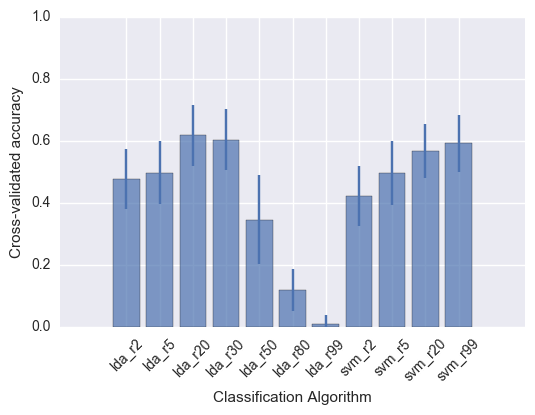

In [42]:
classifiers = ('lda_r2', 'lda_r5', 'lda_r20', 'lda_r30', 'lda_r50','lda_r80','lda_r99', 'svm_r2', 'svm_r5', 'svm_r20', 'svm_r99')
scores = [css_lda_r2_scores.mean(), css_lda_r5_scores.mean(), css_lda_r20_scores.mean(), css_lda_r30_scores.mean(), css_lda_r50_scores.mean(),css_lda_r80_scores.mean(), css_lda_r99_scores.mean(), css_svm_r2_scores.mean(), css_svm_r5_scores.mean(), css_svm_r20_scores.mean(), css_svm_r99_scores.mean()]
scores_err = [css_lda_r2_scores.std(), css_lda_r5_scores.std(), css_lda_r20_scores.std(), css_lda_r30_scores.std(), css_lda_r50_scores.std(), css_lda_r80_scores.std(), css_lda_r99_scores.std(), css_svm_r2_scores.std(), css_svm_r5_scores.std(), css_svm_r20_scores.std(), css_svm_r99_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('CSS_SVMLDA.jpg')

In [29]:
fs_lda_r2_scores = cross_val_class_accuracy(lda, Forelimb_filled_data, Forelimb_speciesID, 2, trainfrac, reps)

fs_lda_r5_scores = cross_val_class_accuracy(lda, Forelimb_filled_data, Forelimb_speciesID, 5, trainfrac, reps)

fs_knn2_r2_scores = cross_val_class_accuracy(kn2_model, Forelimb_filled_data, Forelimb_speciesID, 2, trainfrac, reps)

fs_knn2_r5_scores = cross_val_class_accuracy(kn2_model, Forelimb_filled_data, Forelimb_speciesID, 5, trainfrac, reps)

fs_knn10_r2_scores = cross_val_class_accuracy(kn10_model, Forelimb_filled_data, Forelimb_speciesID, 2, trainfrac, reps)

fs_knn10_r5_scores = cross_val_class_accuracy(kn10_model, Forelimb_filled_data, Forelimb_speciesID, 5, trainfrac, reps)

fs_svm_r2_scores = cross_val_class_accuracy(svc_model, Forelimb_filled_data, Forelimb_speciesID, 2, trainfrac, reps)

fs_svm_r5_scores = cross_val_class_accuracy(svc_model, Forelimb_filled_data, Forelimb_speciesID, 5, trainfrac, reps)

fs_tree_r2_scores = cross_val_class_accuracy(DTC, Forelimb_filled_data, Forelimb_speciesID, 2, trainfrac, reps)

fs_tree_r5_scores = cross_val_class_accuracy(DTC, Forelimb_filled_data, Forelimb_speciesID, 5, trainfrac, reps)

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


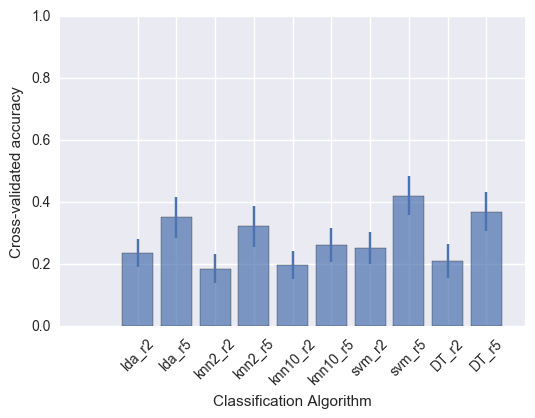

In [30]:
classifiers = ('lda_r2', 'lda_r5', 'knn2_r2', 'knn2_r5', 'knn10_r2', 'knn10_r5', 'svm_r2', 'svm_r5', 'DT_r2', 'DT_r5')
scores = [fs_lda_r2_scores.mean(), fs_lda_r5_scores.mean(), fs_knn2_r2_scores.mean(), fs_knn2_r5_scores.mean(), fs_knn10_r2_scores.mean(), fs_knn10_r5_scores.mean(), fs_svm_r2_scores.mean(), fs_svm_r5_scores.mean(), fs_tree_r2_scores.mean(), fs_tree_r5_scores.mean()]
scores_err = [fs_lda_r2_scores.std(), fs_lda_r5_scores.std(), fs_knn2_r2_scores.std(), fs_knn2_r5_scores.std(), fs_knn10_r2_scores.std(), fs_knn10_r5_scores.std(), fs_svm_r2_scores.std(), fs_svm_r5_scores.std(), fs_tree_r2_scores.std(), fs_tree_r5_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha = 0.7)
plt.xticks(range(len(classifiers)), classifiers, rotation = 45)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')
plt.ylim(0, 1)

plt.savefig('FS_all.jpg')

In [52]:
print(cg_lda_r2_scores.mean(), cg_lda_r5_scores.mean(), cg_lda_r20_scores.mean(), cg_lda_r45_scores.mean(), cg_svm_r2_scores.mean(), cg_svm_r5_scores.mean(), cg_svm_r20_scores.mean(), cg_svm_r45_scores.mean(),cg_lda_r2_scores.mean(), cg_lda_r5_scores.mean(), cg_lda_r20_scores.mean(), cg_lda_r45_scores.mean(), cg_svm_r2_scores.mean(), cg_svm_r5_scores.mean(), cg_svm_r20_scores.mean(), cg_svm_r45_scores.mean())

0.415441176471 0.575588235294 0.803382352941 0.8475 0.462647058824 0.633088235294 0.814411764706 0.825588235294 0.415441176471 0.575588235294 0.803382352941 0.8475 0.462647058824 0.633088235294 0.814411764706 0.825588235294
